<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
# import numpy to work with numbers.
import numpy as np
# set the mean' as 'mu', and 'standard deviation' as 'sigma'.
mu = 180      # mean
sigma = 5     # standard deviation
# create a array for a random sample of '1000'.
sample = np.random.normal(mu, sigma, 1000)

In [0]:
sample

array([187.34938555, 175.79635113, 186.35922382, 175.77727099,
       180.31057239, 180.58915791, 173.99617146, 188.80742938,
       173.68724966, 181.85741106, 185.46583793, 178.54190827,
       177.98146813, 180.6577194 , 175.96305511, 178.86202628,
       174.32332831, 177.3429928 , 184.1546885 , 182.56681077,
       179.39531198, 182.76106895, 181.00852421, 186.02324811,
       173.20413058, 182.7341159 , 176.43980928, 186.34828106,
       180.24858303, 187.04649897, 180.9458363 , 173.07803631,
       184.15746785, 176.81955866, 171.4034349 , 172.24762384,
       176.69763364, 177.20561261, 178.45698026, 184.87883937,
       179.97996658, 179.13253542, 172.1289733 , 181.29298345,
       168.31543076, 173.26958579, 178.02247253, 182.38780385,
       183.10938888, 178.72661041, 177.02806299, 175.14130473,
       180.00710019, 180.76399959, 176.9709803 , 173.75438954,
       184.92713333, 190.37063855, 177.05114591, 180.03337177,
       174.85142474, 176.13556776, 185.05485747, 184.04

In [0]:
# check the 'mean' for the entire sample.
np.mean(sample)

179.96124227916522

In [0]:
# verify the mean of our sample.
abs(mu - np.mean(sample)) < 1

True

In [0]:
# verify the variance of our sample.
abs(sigma - np.std(sample, ddof=1)) < 0.5

True

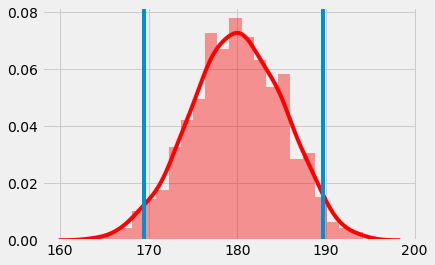

In [0]:
# imnport seaborn for graph.
import seaborn as sns
# import matplotlib for labeling.
from matplotlib import style
# import the 'fivethirtyeight' style.
style.use('fivethirtyeight')

# plot the 'sample' data with color red.
ax = sns.distplot(sample, color='r')
# plot the 'high' confidence interval.
ax.axvline(np.percentile(sample,97.5),0)
# plot the 'low' confidence interval.
ax.axvline(np.percentile(sample,2.5),0);

In [0]:
# look at the 'high' confidence interval.
np.percentile(sample, 97.5)

188.65211782737958

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

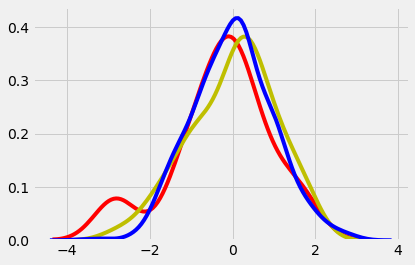

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.2707050546532589
Standard Deviation: 1.1571329114768045
Variance: 1.3389565748227863
t - distribution with 100 degrees of freedom
------------------------------
Mean: 0.003967527019333296
Standard Deviation: 1.0361832746404473
Variance: 1.0736757786446005
t - distribution with 1000 degrees of freedom
------------------------------
Mean: -0.00322680490786826
Standard Deviation: 0.984916501371218
Variance: 0.9700605146733206


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

In [0]:
import pandas as pd

# Missing LAR (no team roster page on NFL.com)
teams = ['ARI','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL','DEN','DET','GB','HOU',
         'IND','JAX','KC','LAC','MIA','MIN','NE','NO','NYG','NYJ','OAK','PHI',
         'PIT','SEA','SF','TB','TEN','WAS']    

df_list = []
for team in teams: 
    df = pd.read_html(f'http://www.nfl.com/teams/roster?team={team}')[1]
    df['Team'] = team
    df.columns = ['No','Name','Pos','Status','Height','Weight','Birthdate','Exp','College','Team']
    df_list.append(df)
    
final_df = pd.concat(df_list, ignore_index=True)
print(final_df.shape)
final_df.head()

(2883, 10)


,No,Name,Pos,Status,Height,Weight,Birthdate,Exp,College,Team
0,23,"Alford, Robert",CB,ACT,"5'10""",186,11/1/1988,7,Southeastern Louisiana,ARI
1,97,"Allen, Zach",DE,ACT,"6'5""",285,8/20/1997,0,Boston College,ARI
2,3,"Anderson, Drew",QB,ACT,"6'4""",221,10/18/1995,0,Murray State,ARI
3,71,"Bailey, Sterling",DE,ACT,"6'3""",296,9/13/1992,1,Georgia,ARI
4,32,"Baker, Budda",SS,ACT,"5'10""",195,1/10/1996,3,Washington,ARI


## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# import all the 't-tests' from scipy stats.
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
# create 2 random arrays with 'mean' 180/178.5, 'standard deviation' 5/4.25 and sample 'size' 1000/800.
burnerA = np.random.normal(180, 5, 1000)
burnerB = np.random.normal(178.5, 4.25, 800)

In [0]:
# show the 'burnerA' array.
burnerA[:10]

array([181.2778024 , 175.94278846, 180.70845133, 181.08205041,
       189.93628257, 185.42831951, 181.56815419, 181.07063899,
       177.77076715, 177.1713706 ])

In [0]:
# show the 'burnerB' array.
burnerB[:10]

array([177.09655505, 176.81862387, 179.38948494, 176.974744  ,
       175.49382134, 172.78623431, 180.73786633, 173.99527873,
       181.51140144, 182.298085  ])

In [0]:
# loop through each sample and print 'mean' & 'standard deviation' for each.
for sample in [burnerA, burnerB]:
  print(f'Mean: {sample.mean()}')
  print(f'StDev: {sample.std()}')
  print('------')

Mean: 180.20871153972297
StDev: 4.779851231280743
------
Mean: 178.61793912797046
StDev: 4.2570615240766765
------


In [0]:
# run a 'ttest_ind()' on both burnerA&B, '2 tail t test'.
tstat, pvalue = ttest_ind(burnerA, burnerB)
print("tstat: ", (tstat))
print("pvalue: ",(pvalue))

tstat:  7.3585999589901725
pvalue:  2.812758024046436e-13


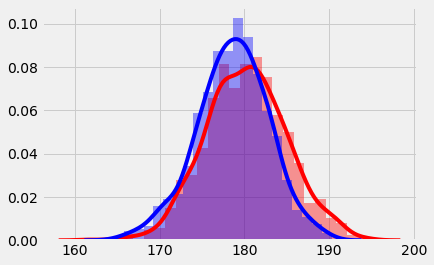

In [0]:
# plot both 'burnerA&B' data with 'dist.plot'.
sns.distplot(burnerA, color='r')
sns.distplot(burnerB, color='b');

In [0]:
# import the load_wine data set with sklearn.
from sklearn.datasets import load_wine
# label the data frame as 'X'.
X = load_wine()
# look at the data.
X

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [0]:
# import pandas to read the data set.
import pandas as pd
# create the data frame, set the data and columns.
wine = pd.DataFrame(X['data'], columns = X['feature_names'])
# create 'origin' column using the 'target' column data.
wine['origin'] = X['target']
# show the shape of the data frame.
print(wine.shape)
# show the data frame with headers.
wine.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,origin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [0]:
# show the data set types.
wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
origin                            int64
dtype: object

In [0]:
# check the counts for the values in 'origin'.
wine.origin.value_counts()

1    71
0    59
2    48
Name: origin, dtype: int64

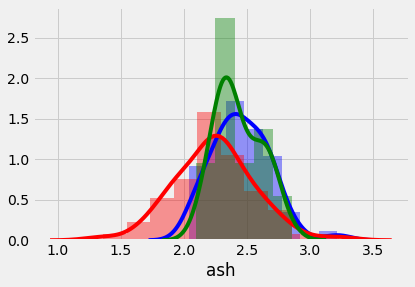

In [0]:
# plot each wine origin value with the 'ash' data, with colors.
sns.distplot(wine[wine['origin'] == 0]['ash'], color = 'b')
sns.distplot(wine[wine['origin'] == 1]['ash'], color = 'r')
sns.distplot(wine[wine['origin'] == 2]['ash'], color = 'g')

In [0]:
# run ttest for '0' & 2.
tstat, pvalue = ttest_ind(wine[wine['origin'] == 1]['ash'], wine[wine['origin'] == 2]['ash'])
print("tstat:", tstat)
print("pvalue:", pvalue)

tstat: -3.802392838959142
pvalue: 0.00022925708961331424


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


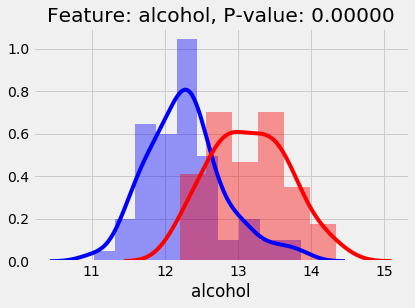

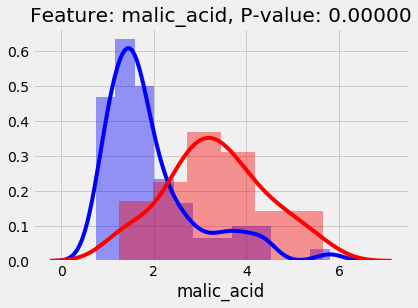

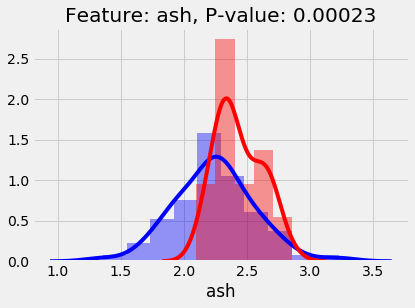

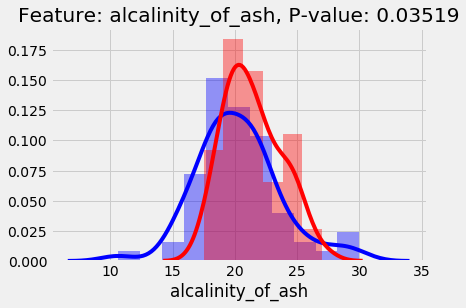

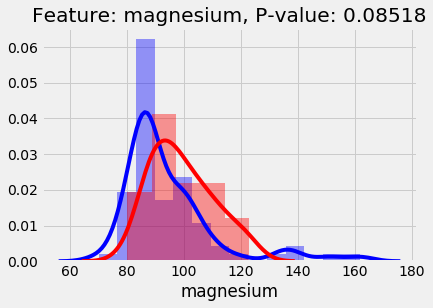

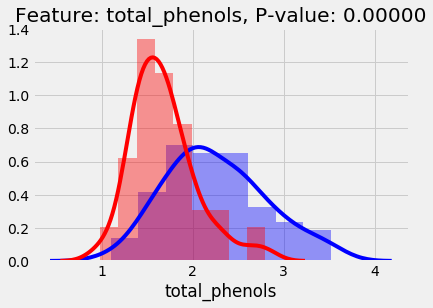

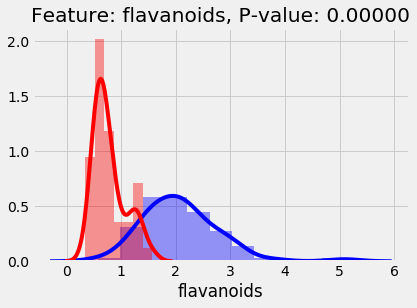

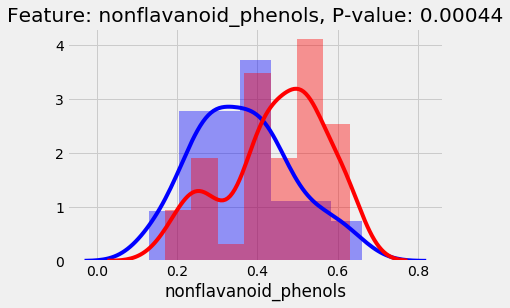

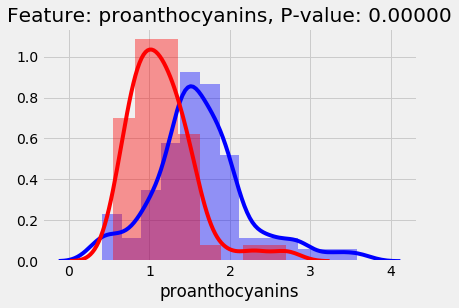

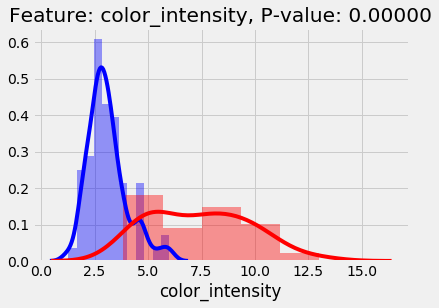

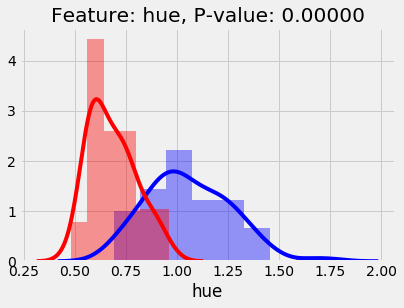

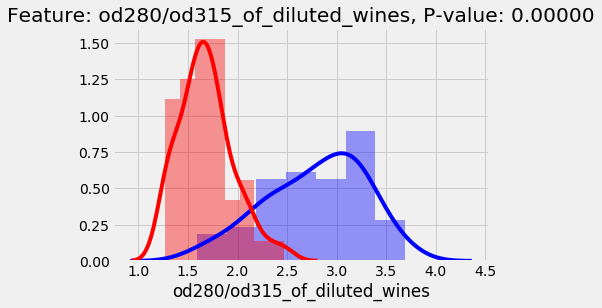

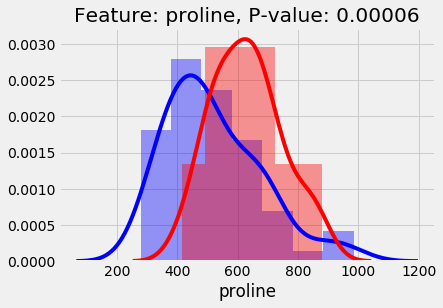

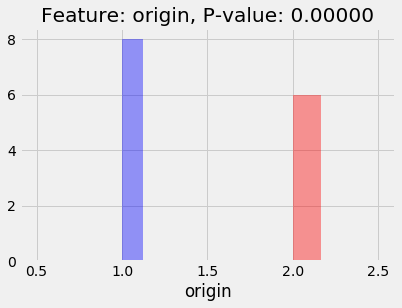

<Figure size 432x288 with 0 Axes>

In [0]:
# import matplotlib.pyplot for labels.
import matplotlib.pyplot as plt
# create a loop that will run a ttest with the 'origin' value & each 'feature', and plot it in a graph.
for feat in wine.columns:
  # Split groups
  group1 = wine[wine['origin'] == 1][feat]
  group2 = wine[wine['origin'] == 2][feat]
  
  # plot with distplot for each group.
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # run t-test, 2 tail.
  _, pvalue = ttest_ind(group1, group2)
  
  # plot labels.
  plt.title(f'Feature: {feat}, P-value: {pvalue:.5f}')
  plt.figure()

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
# import pandas to load the data file.
import pandas as pd 

In [2]:
# label and load the data frame, 'header=None', '? = NaN'.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', na_values='?', header=None)
# label column '0' 'class'.
df = df.rename(columns={0: 'class'})
# show the shape of the data frame.
print(df.shape)
# show the data frame with headers.
df.head()

(435, 17)


,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [3]:
# replace the 'n' with '0'.
df = df.replace('n',0)
# replace the '7' with '1'.
df = df.replace('y',1)
# replace the 'democrat' with '1'.
df = df.replace('democrat', 1)
# replace the 'republican' with '2'.
df = df.replace('republican', 2)
# show the data frame with headers.
df.head()

,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [4]:
# check for NaN values.
df.isna().sum()

class      0
1         12
2         48
3         11
4         11
5         15
6         11
7         14
8         15
9         22
10         7
11        21
12        31
13        25
14        17
15        28
16       104
dtype: int64

In [5]:
# label a new data frame and fill in all the NaN with '.5'.
df1 = df.fillna(.5)
# show the data frame shape.
df1.shape

(435, 17)

In [6]:
# check all the NaN's are gone.
df1.isna().sum()

class    0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
dtype: int64

In [7]:
# check all the data types.
df1.dtypes

class      int64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
dtype: object

In [8]:
# show the data frame and headers.
df1.head() 

,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,1,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


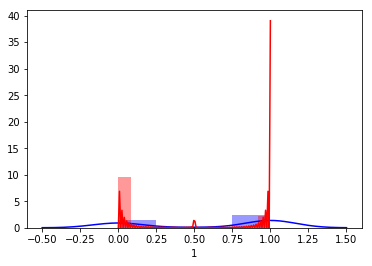

In [9]:
# import seaborn to plot graphs.
import seaborn as sns
# plot the 'class' = '1', for column '1', color 'b' .
sns.distplot(df1[df1['class'] == 1][1], color = 'b')
# plot the 'class' = '2', for column '1', color 'r'.
sns.distplot(df1[df1['class'] == 2][1], color = 'r')

In [0]:
# import scipy.stats imp for 't-tests'.
from scipy.stats import  ttest_ind, ttest_ind_from_stats, ttest_rel

In [11]:
# ttest used on 'class' '1' & '2' for column '1'.
tstat, pvalue = ttest_ind(df1[df1['class'] == 1][1], df1[df1['class'] == 2][1])
# print the 'tstat' for the test.
print('tstat # =', tstat)
# print the 'pvalue' for the test.

print('pvalue # =', pvalue)

tstat # = 9.22317772154614
pvalue # = 1.2761169357253626e-18


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


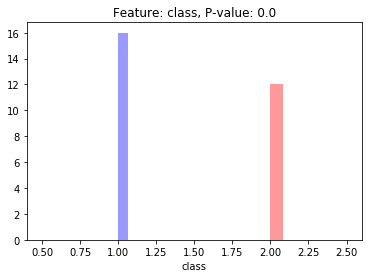

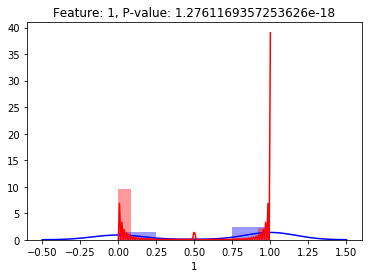

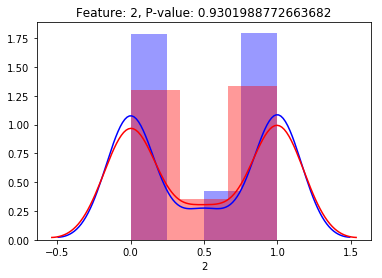

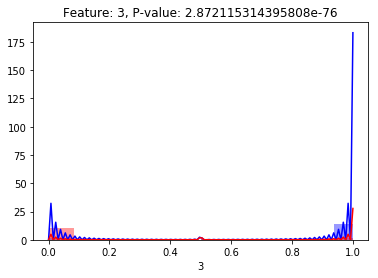

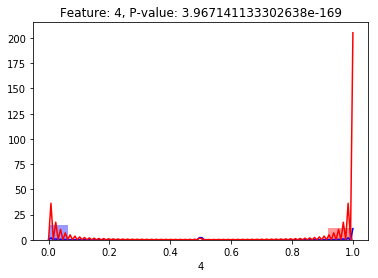

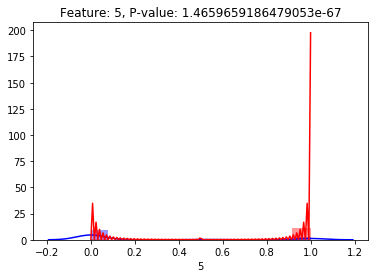

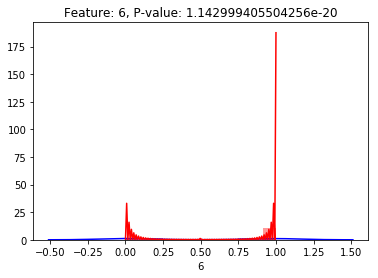

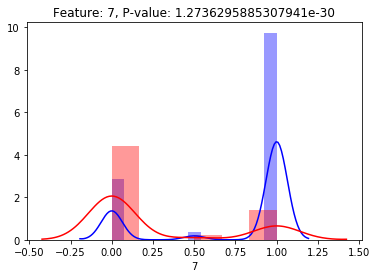

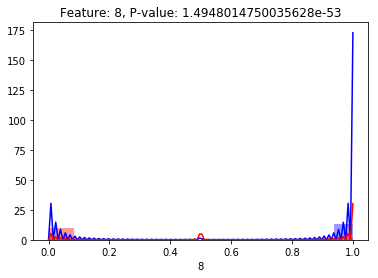

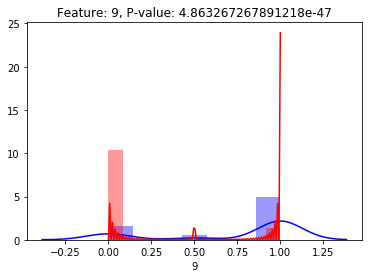

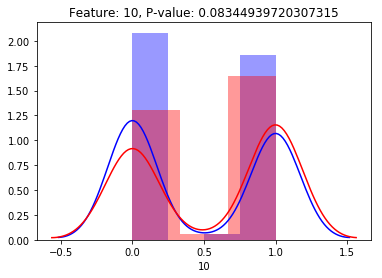

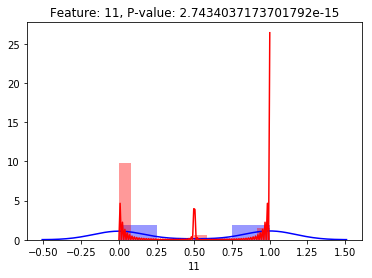

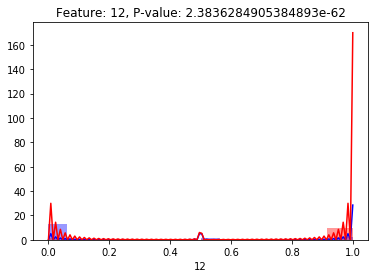

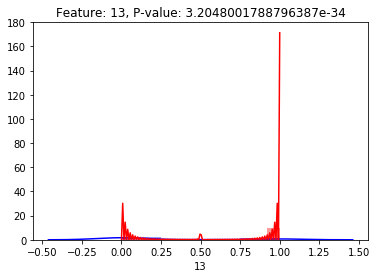

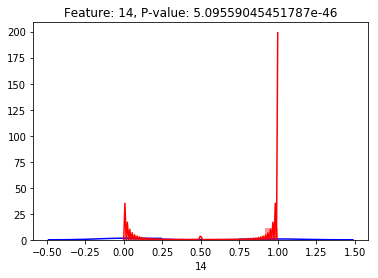

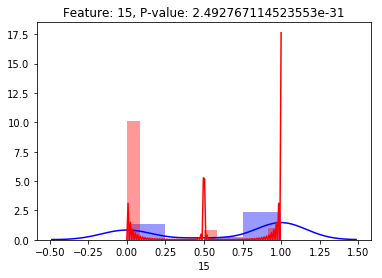

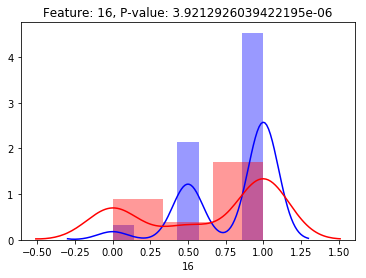

<Figure size 432x288 with 0 Axes>

In [12]:
# import mat plot lib for graphs.
import matplotlib.pyplot as plt
# import seaborn for graphs.
import seaborn as sns
# create a loop.
for feat in df1.columns:
  # Split groups '1' & '2' from 'class'.
  group1 = df1[df1['class'] == 1][feat]
  group2 = df1[df1['class'] == 2][feat]

  # create sns plots for each group with colors.
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # run the ttest_ind for 'group1' & 'group2'.
  _, pvalue = ttest_ind(group1, group2)
  
  # give the graphs a title of the 'feature' and the 'pvalue'.
  plt.title(f'Feature: {feat}, P-value: {pvalue}')

  # plt.figure at the end to finish each loop with a graph.
  plt.figure()

In [13]:
 # create a loop that prints if it rejects or accepts the null hypothesis.
for feat in df1.columns:
  # split the groups.
  group1 = df1[df1['class'] == 1][feat]
  group2 = df1[df1['class'] == 2][feat]
  # use the ttest_ind.
  _, pvalue = ttest_ind(group1, group2)
  # set 1st filter.
  if pvalue<0.01:
      print("reject null hypothesis")
    # set 2nd filter.
  else:
      print("accept null hypothesis")

reject null hypothesis
reject null hypothesis
accept null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
accept null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis


In [14]:
# create two data sets for each class.
democrats = df1.loc[df1['class']== 1]
republicans = df1.loc[df1['class']== 2]
# create a data frame from the 'mean' of each data set.
mean = pd.DataFrame(
    {'Democrats': democrats.mean(),
     'Republicans': republicans.mean()
    })
# set a transverse matrix as it will look better.
df2 = mean.T
#show the data frame with headers.
df2



,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Democrats,1.0,0.601124,0.501873,0.878277,0.067416,0.228464,0.477528,0.764045,0.823970,0.739700,0.471910,0.505618,0.168539,0.301498,0.355805,0.629213,0.801498
Republicans,2.0,0.193452,0.505952,0.142857,0.979167,0.943452,0.892857,0.250000,0.175595,0.122024,0.556548,0.151786,0.842262,0.839286,0.961310,0.119048,0.636905


In [15]:
# show the types of data.
df2.dtypes

class    float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
dtype: object

In [16]:
# create two data sets for each class.
democrats = df1.loc[df1['class']== 1]
republicans = df1.loc[df1['class']== 2]
# create a data frame from the 'sum' of each data set.
sum1 = pd.DataFrame(
    {'Democrats': democrats.sum(),
     'Republicans': republicans.sum()
    })
# set a transverse matrix as it will look better.
df3 = sum1.T
#show the data frame with headers.
df3

,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Democrats,267.0,160.5,134.0,234.5,18.0,61.0,127.5,204.0,220.0,197.5,126.0,135.0,45.0,80.5,95.0,168.0,214.0
Republicans,336.0,32.5,85.0,24.0,164.5,158.5,150.0,42.0,29.5,20.5,93.5,25.5,141.5,141.0,161.5,20.0,107.0


# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means